In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv('winequality-red.csv',sep=';')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

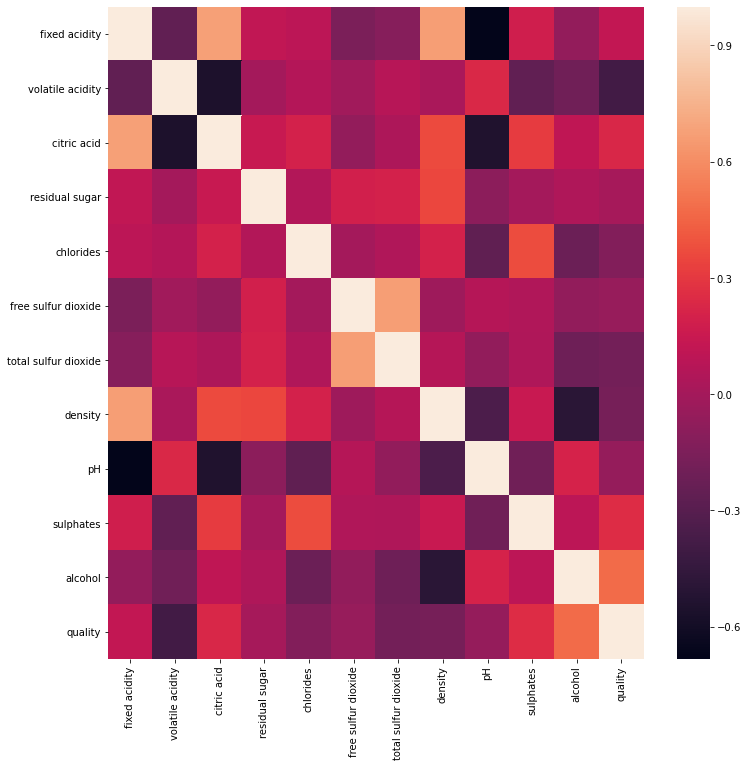

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

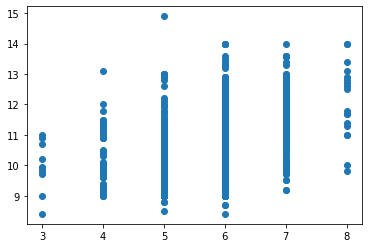

In [18]:
plt.scatter(df['quality'],df['alcohol'])

In [19]:
X = df.drop('quality',axis = 1)
y = df['quality']

In [51]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30,random_state=531)

In [22]:
#We will calculate the mean square error for each model as we increase the number of n_estimators
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

<h5>First, we will use a random forest regressor from ensemble models and fit it multiple times with different values of n_estimators

In [93]:
MSE_lst = []

#Lets vary the number of n_estimators between 50 and 500 with a step increase of 10
nTreeList = range(50, 500, 10)

In [94]:
#You can change the number of Max_Features to play with the model or even change the range of nTreeList
for n_Tree in nTreeList:
    
    depth = None
    Max_Features = 4
    #initialize our random forest model
    RF_ensemble_model = ensemble.RandomForestRegressor(n_estimators=n_Tree,
        max_depth=depth, max_features=Max_Features,
        oob_score=False, random_state=531)
    
    #fit our model with the training data 
    RF_ensemble_model.fit(xTrain,yTrain)
    #Get predictions from our model using our test data and store the mean squared error in the MSE_lst
    prediction = RF_ensemble_model.predict(xTest)
    MSE_lst.append(mean_squared_error(yTest, prediction))

Text(0, 0.5, 'Mean Squared Error')

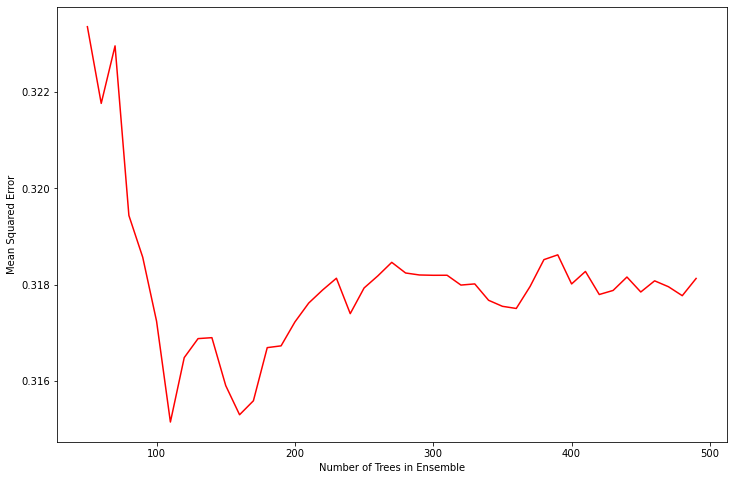

In [95]:
#lets plot the relation between n_estimator and the mean squared error
plt.figure(figsize=(12,8))
plt.plot(nTreeList, MSE_lst,'r')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')

In [32]:
#Lets also plot out the importance of each feature in a numerical form according to our model
Feat_Imp = RF_ensemble_model.feature_importances_

In [34]:
labels = df.columns

Text(0.5, 0, 'Variable Importance')

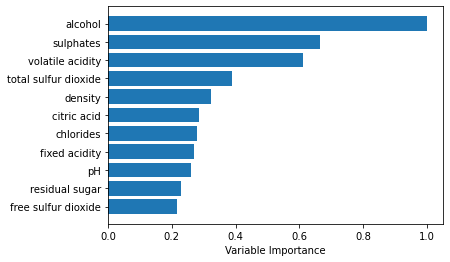

In [36]:
Feat_Imp = Feat_Imp / Feat_Imp.max()
Desc_Feat_Imp = np.argsort(Feat_Imp)
Desc_Bar_Pos = np.arange(Desc_Feat_Imp.shape[0]) + .5
plt.barh(Desc_Bar_Pos, Feat_Imp[Desc_Feat_Imp], align='center')
plt.yticks(Desc_Bar_Pos, labels[Desc_Feat_Imp])
plt.xlabel('Variable Importance')

<h4>Using the above data and visualizations, you can select a good value for n_estimators and the max_features and the variables to add to the model for fitting according to the feature importance and the correlation 

<h5>Now Lets use a gradient boosting regressor and compare the results</h5>

In [67]:
#These default values should be set if you are a beginner with the GB model
#You can play around the values as well
n_Est_GB = 2000
depth_GB = 7
learnRate_GB = 0.01
subSamp_GB = 0.5
GB_ensemble_model = ensemble.GradientBoostingRegressor(n_estimators=n_Est_GB, max_depth=depth_GB,
learning_rate=learnRate_GB, subsample = subSamp_GB, loss='ls')

#loss = > loss function = > 'ls' = > 'Least mean squared error'

In [68]:
GB_ensemble_model.fit(xTrain,yTrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
MSE_GB_lst = []
GB_pred = GB_ensemble_model.staged_predict(xTest)
for pred in GB_pred:
    MSE_GB_lst.append(mean_squared_error(yTest, pred))

In [71]:
#This shows the lowest value of loss during fitting and it occured at the 650th cycle
print(min(MSE_GB_lst))
print(MSE_GB_lst.index(min(MSE_GB_lst)))

0.3201297798029658
650


Text(0, 0.5, 'Mean Squared Error')

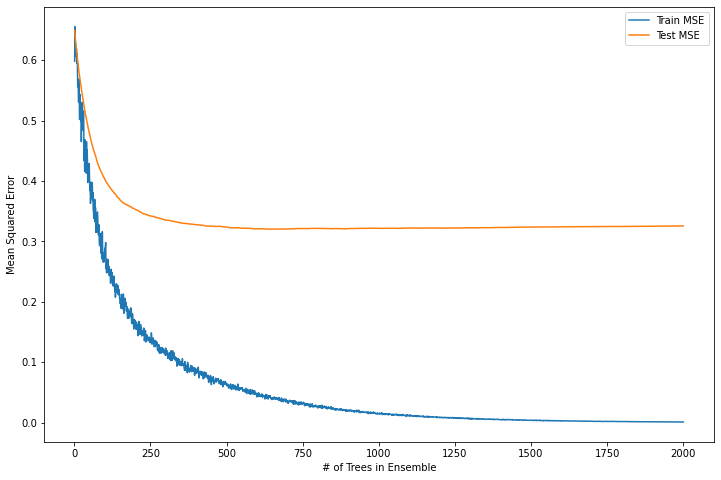

In [88]:
#Lets create some comparison plots
plt.figure(figsize=(12,8))
plt.plot(range(1, n_Est_GB + 1), GB_ensemble_model.train_score_,label='Train MSE')
plt.plot(range(1, n_Est_GB + 1), MSE_GB_lst, label='Test MSE')
plt.legend(loc='upper right')
plt.xlabel('# of Trees in Ensemble')
plt.ylabel('Mean Squared Error')

In [78]:
#Lets also plot out the importance of each feature in a numerical form according to our model and compare 
#it to the results of the random forest
GB_Feat_Imp = GB_ensemble_model.feature_importances_

Text(0.5, 0, 'Variable Importance')

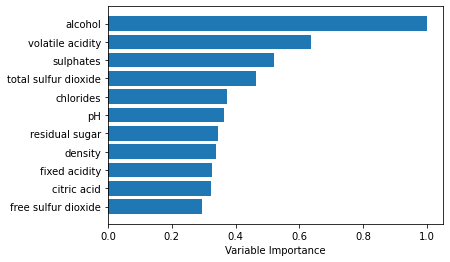

In [79]:
GB_Feat_Imp = GB_Feat_Imp / GB_Feat_Imp.max()
GB_Desc_Feat_Imp = np.argsort(GB_Feat_Imp)
GB_Desc_Bar_Pos = np.arange(GB_Desc_Feat_Imp.shape[0]) + .5
plt.barh(GB_Desc_Bar_Pos, GB_Feat_Imp[GB_Desc_Feat_Imp], align='center')
plt.yticks(GB_Desc_Bar_Pos, labels[GB_Desc_Feat_Imp])
plt.xlabel('Variable Importance')

To compare the variable importance of both models, lets use subplots

In [96]:
#plt.figure(figsize=(8,8))
#plt.subplot(2,1,1)
#plt.barh(Desc_Bar_Pos, Feat_Imp[Desc_Feat_Imp], align='center')
#plt.yticks(Desc_Bar_Pos, labels[Desc_Feat_Imp])
#plt.title('Ensemble Random Forest',color='r')
#plt.subplot(2,1,2)
#plt.barh(GB_Desc_Bar_Pos, GB_Feat_Imp[GB_Desc_Feat_Imp], align='center')
#plt.title('Ensemble Gradient Boosting',color='r')
#plt.yticks(GB_Desc_Bar_Pos, labels[GB_Desc_Feat_Imp])
#plt.xlabel('Variable Importance')

<h4>Using the above data and visualizations, you can select a good value for n_estimators the variables to add to the model for fitting according to the feature importance. You can also play with the learning rate and depth and check the results